In [1]:
import argparse, os, collections


import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import roc_auc_score

In [2]:
!cat /oak/stanford/groups/mrivas/users/ytanigaw/repos/rivas-lab/PRS/helper/compute_r_or_auc.py

_README_ = '''
-------------------------------------------------------------------------
compute_r_or_auc.py

Evaluation script for PRS score by computing r or AUC

Author: Yosuke Tanigawa (ytanigaw@stanford.edu)
Date: 2019/02/25
-------------------------------------------------------------------------
'''


import argparse, os, collections


import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import roc_auc_score


def read_seed(seed_file):
    with open(seed_file) as f:
        s = int(f.read().splitlines()[0])    
    return s


def read_data(in_score, phe, covar_phe, keep=None):
    df = pd.read_csv(
        in_score, sep='\t', usecols=[1,4]
    ).merge(
        pd.read_csv(
            phe, sep='\t', usecols=[1,2], names=['IID', 'phe']
        ),
        on='IID'
    ).merge(
        pd.read_csv(
            covar_phe, sep='\t', usecols=[1,2,3,5,6,7,8]
        ),
        on='IID'
    )
    df_non_missing

In [41]:
def compute_score_for_covariates(df, betas, center=False, Z=False):
    betas_df=pd.read_csv(betas, compression='gzip', sep='\t')
    covar_mat = df[list(betas_df['ID'])].values
    
    betas_vec = np.array(betas_df['BETA'])[:,np.newaxis]
    
    if 'mean' in set(betas_df.columns) and (center or Z):
        covar_mat_centered = (covar_mat - np.array(betas_df['mean'])[np.newaxis, :])
        if 'Z' in set(betas_df.columns) and Z:
            covar_mat_Z = (covar_mat_centered / np.array(betas_df['std'])[np.newaxis, :])
            return np.dot(covar_mat_Z, betas_vec)
        else:
            return np.dot(covar_mat_centered, betas_vec)
    else:            
        return np.dot(covar_mat, betas_vec)


In [4]:
import sys
sys.path.append("/home/users/ytanigaw/repos/rivas-lab/PRS/helper/")

In [5]:
from rivaslab_PRS_misc import *

In [6]:
default_seed_file=os.path.realpath(os.path.join('../helper', 'rand.seed.txt'))
seed_file = default_seed_file

in_score='/oak/stanford/groups/mrivas/projects/PRS/private_output/snpnet_PRS/test/4_score/INI5255.sscore'
keep='/oak/stanford/groups/mrivas/projects/PRS/private_output/snpnet_PRS/test/1_split/INI5255.test'
phe='/oak/stanford/groups/mrivas/projects/PRS/private_output/snpnet_PRS/test/0_input/INI5255.phe'
phe_type='qt'
covar_phe='/oak/stanford/groups/mrivas/private_data/ukbb/24983/sqc/ukb24983_GWAS_covar.phe'
betas='/oak/stanford/groups/mrivas/projects/PRS/private_output/snpnet_PRS/test/3_snpnet/INI5255.covars.tsv.gz'
out_file=None



In [8]:
def compute_r_or_auc_main(in_score, phe, phe_type, covar_phe, keep, out_file, seed_file=None):    
    df = read_data_for_eval(in_score=in_score, phe=phe, covar_phe=covar_phe, keep=keep)
    
    PRS = collections.OrderedDict()
    
    PRS['Genotype_only'] = df[['SCORE1_SUM']].values
    PRS['Covariates_only'] = compute_score_for_covariates(df, betas)
    PRS['Covariates_only_center'] = compute_score_for_covariates(df, betas, center=True)
    PRS['Covariates_only_Z'] = compute_score_for_covariates(df, betas, Z=True)
    PRS['Genotype_and_covariates'] = PRS['Genotype_only'] + PRS['Covariates_only']
    PRS['Genotype_and_covariates_center'] = PRS['Genotype_only'] + PRS['Covariates_only_center']
    PRS['Genotype_and_covariates_Z'] = PRS['Genotype_only'] + PRS['Covariates_only_Z']

    Y  = np.array(df['phe'])
    prs_eval = PRS_eval(phe_type, seed_file)
    for k,v in PRS.items():
        prs_eval.compute_r_or_auc(k, v, Y)    

    info_str='\t'.join([in_score, phe_type])
    results_str = prs_eval.format_metrics(info_str)
    with open(out_file, 'w') as fw:        
        fw.write(results_str + '\n')        
    print(results_str)

In [57]:
print(prs_eval.format_metrics())

Genotype_only	3.809480e-01
Covariates_only	7.316330e-02
Covariates_only_center	7.316330e-02
Covariates_only_Z	7.316330e-02
Genotype_and_covariates	3.784929e-01
Genotype_and_covariates_center	3.784929e-01
Genotype_and_covariates_Z	3.784929e-01


In [77]:
betas

'/oak/stanford/groups/mrivas/projects/PRS/private_output/snpnet_PRS/test/3_snpnet/INI5255.covars.tsv.gz'

In [ ]:
compute_covar_Z_transform(covar_phe, keep=None, covars=None)

In [231]:
dff = compute_covar_Z_transform(
    covar_phe, '{}.train'.format(keep[:-5]), )

In [227]:
dff = compute_covar_Z_transform(
    covar_phe, '{}.train'.format(keep[:-5]), 
    ['age', 'sex'] + ['PC{}'.format(x + 1) for x in range(10)]
)

In [16]:
in_score='/oak/stanford/groups/mrivas/projects/PRS/private_output/snpnet_PRS/test/4_score/INI5255.sscore'
keep='/oak/stanford/groups/mrivas/projects/PRS/private_output/snpnet_PRS/test/1_split/INI5255.test'
phe='/oak/stanford/groups/mrivas/projects/PRS/private_output/snpnet_PRS/test/0_input/INI5255.phe'
phe_type='qt'
covar_phe='/oak/stanford/groups/mrivas/private_data/ukbb/24983/sqc/ukb24983_GWAS_covar.phe'
betas='/oak/stanford/groups/mrivas/projects/PRS/private_output/snpnet_PRS/test/3_snpnet/INI5255.covars.tsv.gz'
out_file=None


In [5]:
def compute_r_or_auc_main(in_score, phe, phe_type, covar_phe, keep, out_file, seed_file=None):    
    df = read_data(in_score=in_score, phe=phe, covar_phe=covar_phe, keep=keep)
    
    covars=['age', 'sex']+['PC{}'.format(x+1) for x in range(4)]
    X1 = df[['SCORE1_SUM']].values
    X2 = df[covars].values
    X3 = df[covars + ['SCORE1_AVG']].values
    Y  = np.array(df['phe'])
    
    if phe_type in set(['linear', 'qt']):
        eval1 = compute_r(X1, Y)
        eval2 = compute_r(X2, Y)
        eval3 = compute_r(X3, Y)
        
    elif phe_type in set(['binary', 'bin']):
        print(collections.Counter(Y))        
        if seed_file is None:
            seed = None
        else: 
            seed = int(np.loadtxt(seed_file))
            
        eval1 = compute_auc(X1, Y, seed)
        eval2 = compute_auc(X2, Y, seed)
        eval3 = compute_auc(X3, Y, seed)

    results_str='\n'.join(
        ['\t'.join(
	    [in_score, phe_type, features, '{:.6e}'.format(score)]
	) for features, score 
	in zip(['PRS', 'covars', 'PRS_and_covars'], [eval1, eval2, eval3] ) ]
    )
    with open(out_file, 'w') as fw:        
        fw.write(results_str + '\n')        
    print(results_str)

In [122]:
df = read_data(in_score=in_score, phe=phe, covar_phe=covar_phe, keep=keep)


In [123]:
df.head()

,IID,SCORE1_SUM,phe,FID,age,sex,Array,PC1,PC2,PC3,...,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40
0,1000133,-1.237130,15.98,1000133,63.0,1,1,-13.8153,6.02267,-2.615060,...,-3.968920,-0.056698,0.591308,0.294467,3.442910,0.564697,-0.717647,-0.792077,7.06351,3.03296
1,1000655,-1.659550,16.57,1000655,61.0,0,1,-10.5851,2.37132,-1.162400,...,1.768540,5.789810,-1.769310,-2.649860,-1.332750,3.003170,2.418410,-7.429700,-5.47440,-4.47614
2,1001228,-1.327700,21.97,1001228,75.0,0,0,-10.1370,4.22757,-0.513486,...,4.520870,-2.016920,-3.367390,4.862630,-2.828880,-5.933400,0.826748,4.931200,-1.71861,-4.92662
3,1001530,-0.641403,12.82,1001530,56.0,0,1,-11.9339,2.91273,-1.275990,...,0.764844,-4.047970,-2.466990,-2.330550,0.204806,1.406940,5.412000,-1.945510,2.72020,-6.10042
4,1001996,-2.466370,12.50,1001996,67.0,0,1,-13.4106,4.41931,0.411471,...,-0.593947,0.771685,2.494230,1.187790,1.754240,-2.096500,-2.513970,-2.662650,2.08631,2.20632


In [124]:
df_train = read_data(in_score=in_score, phe=phe, covar_phe=covar_phe, keep='{}.train'.format(keep[:-5]))


In [125]:
betas_df=pd.read_csv(betas, compression='gzip', sep='\t')

In [126]:
betas_df

,ID,BETA
0,age,0.041458
1,sex,0.119146
2,PC1,-0.030971
3,PC2,0.021378
4,PC3,0.016889
5,PC4,-0.001608
6,PC5,0.001510
7,PC6,0.009285
8,PC7,-0.011646
9,PC8,-0.002345


In [139]:
covar_mat = df[list(betas_df['ID'])].values

In [140]:
covar_train = df_train[list(betas_df['ID'])].values
(covar_mat - covar_train.mean(axis=0)[np.newaxis,:])

In [141]:
covar_mat_Z = ((covar_mat - covar_train.mean(axis=0)[np.newaxis,:]) / covar_train.std(axis=0)[np.newaxis,:])

In [142]:
covar_mat_Z.shape

(16303, 12)

In [143]:
pred_Z = np.dot(
        covar_mat_Z,
        np.array(list(betas_df['BETA']))[:,np.newaxis]
    )    

In [144]:
pred = np.dot(
        covar_mat,
        np.array(list(betas_df['BETA']))[:,np.newaxis]
    )    

In [145]:
pred.shape

(16303, 1)

In [146]:
def compute_score_for_covariates(df, betas):
    betas_df=pd.read_csv(betas, compression='gzip', sep='\t')
    covar_mat = df[list(betas_df['ID'])].values
    return 

In [147]:
covar_mat.shape

(16303, 12)

In [148]:
covar_mat.mean(axis=0).shape

(12,)

(array([  28.,  171.,  794., 2515., 4521., 4656., 2645.,  822.,  143.,
           8.]),
 array([-1.99053 , -0.837363,  0.315804,  1.468971,  2.622138,  3.775305,
         4.928472,  6.081639,  7.234806,  8.387973,  9.54114 ]),
 <a list of 10 Patch objects>)

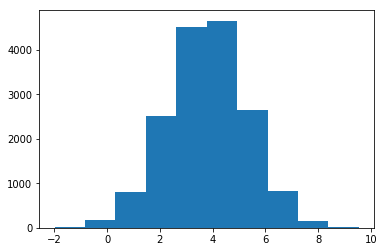

In [150]:
plt.hist(covar_mat[:, 3])

In [100]:
covar_mat_Z.mean(axis=0)

array([ 1.55087768e-02, -4.20537170e-03, -1.22619662e-02, -7.77058311e-03,
       -1.98238028e-02,  1.40361650e-02,  7.74132330e-05,  7.15122607e-03,
       -8.56347755e-03, -4.19439141e-04,  3.30182967e-03,  5.39700517e-03])

(array([  28.,  171.,  794., 2515., 4521., 4656., 2645.,  822.,  143.,
           8.]),
 array([-1.99053 , -0.837363,  0.315804,  1.468971,  2.622138,  3.775305,
         4.928472,  6.081639,  7.234806,  8.387973,  9.54114 ]),
 <a list of 10 Patch objects>)

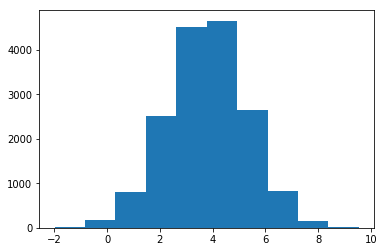

In [72]:
plt.hist(covar_mat[:, 3])

In [151]:
df['SCORE_COVARS']= pred

In [152]:
import matplotlib.pyplot as plt

(array([  45.,  538., 2075., 3446., 2248., 1052., 2169., 3085., 1501.,
         144.]),
 array([-0.33505172, -0.27096771, -0.2068837 , -0.14279969, -0.07871568,
        -0.01463167,  0.04945234,  0.11353635,  0.17762036,  0.24170437,
         0.30578838]),
 <a list of 10 Patch objects>)

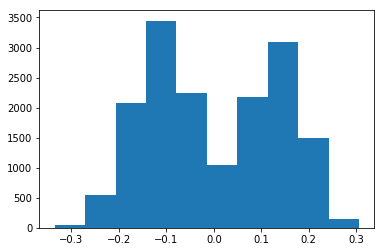

In [153]:
plt.hist(X2)

In [154]:
df['SCORE_GEN_COVAR'] = df['SCORE1_SUM'] + df['SCORE_COVARS']
Y  = np.array(df['phe'])
X1 = df[['SCORE1_SUM']].values
X2 = df[['SCORE_COVARS']].values
X3 = df[['SCORE_GEN_COVAR']].values


In [155]:
if phe_type in set(['linear', 'qt']):
    eval1 = compute_r(X1, Y)
    eval2 = compute_r(X2, Y)
    eval3 = compute_r(X3, Y)

elif phe_type in set(['binary', 'bin']):
    print(collections.Counter(Y))        
    if seed_file is None:
        seed = None
    else: 
        seed = read_seed(seed_file)

    eval1 = compute_auc(X1, Y, seed)
    eval2 = compute_auc(X2, Y, seed)
    eval3 = compute_auc(X3, Y, seed)


In [156]:
results_str='\n'.join(
    ['\t'.join(
    [in_score, phe_type, features, '{:.6e}'.format(score)]
) for features, score 
in zip(['PRS', 'covars', 'PRS_and_covars'], [eval1, eval2, eval3] ) ]
)

In [157]:
print(results_str)

/oak/stanford/groups/mrivas/projects/PRS/private_output/snpnet_PRS/test/4_score/INI5255.sscore	qt	PRS	3.809480e-01
/oak/stanford/groups/mrivas/projects/PRS/private_output/snpnet_PRS/test/4_score/INI5255.sscore	qt	covars	7.316330e-02
/oak/stanford/groups/mrivas/projects/PRS/private_output/snpnet_PRS/test/4_score/INI5255.sscore	qt	PRS_and_covars	3.784929e-01


In [136]:
print(results_str)

/oak/stanford/groups/mrivas/projects/PRS/private_output/snpnet_PRS/test/4_score/INI5255.sscore	qt	PRS	3.809480e-01
/oak/stanford/groups/mrivas/projects/PRS/private_output/snpnet_PRS/test/4_score/INI5255.sscore	qt	covars	3.721723e-02
/oak/stanford/groups/mrivas/projects/PRS/private_output/snpnet_PRS/test/4_score/INI5255.sscore	qt	PRS_and_covars	3.823290e-01


In [97]:
print(results_str)

/oak/stanford/groups/mrivas/projects/PRS/private_output/snpnet_PRS/test/4_score/INI5255.sscore	qt	PRS	3.809480e-01
/oak/stanford/groups/mrivas/projects/PRS/private_output/snpnet_PRS/test/4_score/INI5255.sscore	qt	covars	3.721723e-02
/oak/stanford/groups/mrivas/projects/PRS/private_output/snpnet_PRS/test/4_score/INI5255.sscore	qt	PRS_and_covars	3.746690e-02


In [33]:
in_score='/oak/stanford/groups/mrivas/projects/PRS/private_output/vanilla_PRS/5_score/1e-5/ukb16698_v2.1001.PHENO1.glm.logistic.hybrid.sscore'
phe='/oak/stanford/groups/mrivas/projects/PRS/private_output/vanilla_PRS/0_input/1001.phe'
phe_type='bin'
covar_phe=os.path.join(
        '/oak/stanford/groups/mrivas',
        'private_data/ukbb/16698/sqc/ukb16698_GWAS_covar.phe'
    )
seed_file='/oak/stanford/groups/mrivas/users/ytanigaw/repos/rivas-lab/PRS/helper/rand.seed.txt'
keep='/oak/stanford/groups/mrivas/projects/PRS/private_output/vanilla_PRS/1_split/1001.test'
out_file='/oak/stanford/groups/mrivas/projects/PRS/private_output/vanilla_PRS/6_eval/1e-5/ukb16698_v2.1001.PHENO1.glm.logistic.hybrid.sscore.eval'



In [34]:
df = read_data(in_score=in_score, phe=phe, covar_phe=covar_phe, keep=keep)

In [36]:
df.shape

(67439, 9)

In [37]:
covars=['age', 'sex']+['PC{}'.format(x+1) for x in range(4)]
X1 = df[['SCORE1_AVG']].values
X2 = df[covars + ['SCORE1_AVG']].values
Y  = np.array(df['phe'])

In [38]:
import collections

In [39]:
collections.Counter(Y)

Counter({1: 67043, 2: 396})

In [40]:
seed = read_seed(seed_file)        

In [41]:
seed

20190213

In [43]:
def compute_auc(x, y, seed=None):
    lm = LogisticRegression(
        random_state=seed, solver='lbfgs'
    ).fit(x, y)
    roc_auc = roc_auc_score(y, lm.predict_log_proba(x)[:, 1])
    return max(roc_auc, 1 - roc_auc)    


In [44]:
eval1 = compute_auc(X1, Y, seed)

In [45]:
eval1

0.5165949013274611

In [21]:
!ls $covar_phe

/oak/stanford/groups/mrivas/private_data/ukbb/16698/sqc/ukb16698_GWAS_covar.phe


In [35]:
s = read_seed(seed_file='../helper/rand.seed.txt')

In [ ]:
os.

In [24]:
xs = np.arange(10).reshape(10, 1)

In [25]:
ys = np.array([0, 0, 0, 1, 0, 1, 1, 1, 0, 1])

In [36]:
lm = LogisticRegression(random_state=s, solver='lbfgs').fit(xs, ys)

In [38]:
lm.predict_proba(xs)[:, 0]

array([0.86298863, 0.80711525, 0.7354417 , 0.6487264 , 0.55094303,
       0.44905681, 0.35127345, 0.26455818, 0.19288465, 0.1370113 ])

In [39]:
roc_auc_score(ys, lm.predict_proba(xs)[:, 0])

0.19999999999999998

In [42]:
roc_auc_score(ys, lm.predict_log_proba(xs)[:, 1])

0.8

In [14]:
in_score='/oak/stanford/groups/mrivas/projects/PRS/private_output/vanilla_PRS/5_score/1e-3/ukb24983_v2.INI30150.PHENO1.glm.linear.sscore'
keep='/oak/stanford/groups/mrivas/projects/PRS/private_output/vanilla_PRS/1_split/INI30150.test'
phe='/oak/stanford/groups/mrivas/projects/PRS/private_output/vanilla_PRS/0_input/INI30150.phe'
out_file='/oak/stanford/groups/mrivas/projects/PRS/private_output/vanilla_PRS/6_eval/1e-3/ukb24983_v2.INI30150.PHENO1.glm.linear.sscore.eval'
phe_type='linear'

covar_phe='/oak/stanford/groups/mrivas/private_data/ukbb/24983/sqc/ukb24983_GWAS_covar.phe'


In [5]:
df = read_data(in_score=in_score, phe=phe, covar_phe=covar_phe, keep=keep)


In [6]:
covars=['age', 'sex']+['PC{}'.format(x+1) for x in range(4)]
X1 = df[['SCORE1_AVG']].values
X2 = df[covars + ['SCORE1_AVG']].values
Y  = np.array(df['phe'])


In [15]:
if phe_type in set(['linear', 'qt']):
    results_str='{:.6e}\t{:.6e}'.format(compute_r(X1, Y), compute_r(X2, Y))
elif phe_type in set(['binary', 'bin']):
    results_str='{:.6e}\t{:.6e}'.format(compute_auc(X1, Y), compute_auc(X2, Y))
    

In [16]:
with open(out_file, 'w') as fw:
    fw.write(results_str)

In [8]:
r1, r2

(0.00031338317218780896, 0.09304982034208101)

In [2]:
import numpy as np
import pandas as pd
import scipy
import matplotlib, collections, itertools, os, re, textwrap, logging
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
from functools import reduce

In [3]:
in_score='/oak/stanford/groups/mrivas/projects/PRS/private_output/vanilla_PRS/5_score/1e-3/ukb24983_v2.INI30150.PHENO1.glm.linear.sscore'
keep='/oak/stanford/groups/mrivas/projects/PRS/private_output/vanilla_PRS/1_split/INI30150.test'
phe='/oak/stanford/groups/mrivas/projects/PRS/private_output/vanilla_PRS/0_input/INI30150.phe'
out_file='/oak/stanford/groups/mrivas/projects/PRS/private_output/vanilla_PRS/6_eval/1e-3/ukb24983_v2.INI30150.PHENO1.glm.linear.sscore.eval'

covar_phe='/oak/stanford/groups/mrivas/private_data/ukbb/24983/sqc/ukb24983_GWAS_covar.phe'

In [32]:
def read_data(in_score, phe, covar_phe, keep=None):
    df = pd.read_csv(
        in_score, sep='\t', usecols=[1,4]
    ).merge(
        pd.read_csv(
            phe, sep='\t', usecols=[1,2], names=['IID', 'phe']
        ),
        on='IID'
    ).merge(
        pd.read_csv(
            covar_phe, sep='\t', usecols=[1,2,3,5,6,7,8]
        ),
        on='IID'
    )
    df_non_missing=df[df['phe'] != 9]
    if keep is None:
        return df_non_missing
    else:
        return df_non_missing.merge(
            pd.read_csv(
                keep, sep=' ', usecols=[0], names=['IID']
            ),
            on='IID',
            how='inner'
        )

In [33]:
df = read_data(in_score, phe, covar_phe, keep=keep)

In [27]:
from sklearn.linear_model import LinearRegression

In [42]:
covars=['age', 'sex']+['PC{}'.format(x+1) for x in range(4)]

In [60]:
X1 = df[['SCORE1_AVG']].values
X2 = df[covars + ['SCORE1_AVG']].values
Y  = np.array(df['phe'])


In [61]:
lm1 = LinearRegression().fit(X1, Y)
lm2 = LinearRegression().fit(X2, Y)

In [75]:
r1 = np.corrcoef(Y, lm1.predict(X1))[0, 1]
r2 = np.corrcoef(Y, lm2.predict(X2))[0, 1]

In [76]:
r1, r2

(0.00031338317218780896, 0.09304982034208101)

In [77]:
with open(out_file, 'w') as fw:
    fw.write('{:.4e}\t{:.4e}'.format(r1, r2))

In [78]:
!cat $out_file

3.1338e-04	9.3050e-02

In [47]:
df[covars + ['SCORE1_AVG']].values

array([[ 6.80000e+01,  1.00000e+00, -1.28332e+01, ..., -1.56921e+00,
         6.66705e-01,  6.90431e+04],
       [ 6.90000e+01,  0.00000e+00, -1.04515e+01, ..., -3.33649e+00,
         5.72834e-01,  6.92104e+04],
       [ 7.10000e+01,  0.00000e+00, -1.35059e+01, ..., -2.51258e+00,
         2.05912e+00,  6.95568e+04],
       ...,
       [ 5.00000e+01,  1.00000e+00, -1.30382e+01, ..., -1.94583e+00,
         7.62227e-01,  6.86158e+04],
       [ 6.40000e+01,  0.00000e+00, -1.45310e+01, ..., -2.87338e+00,
        -3.33143e+00,  6.92368e+04],
       [ 7.50000e+01,  1.00000e+00, -1.29570e+01, ..., -2.09221e+00,
         1.85859e+00,  7.26215e+04]])

In [43]:
covars

['age', 'sex', 'PC1', 'PC2', 'PC3', 'PC4']

In [40]:
[x for x in df.columns if x not in set(['IID', 'phe'])]

['SCORE1_AVG', 'age', 'sex', 'PC1', 'PC2', 'PC3', 'PC4']

In [45]:
def rsquared(x, y):
    """ Return R^2 where x and y are array-like."""

    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)
    return r_value**2

In [4]:
score_file='../private_output/plink_score_INI50_test.sscore'
phe_file='/oak/stanford/groups/mrivas/private_data/ukbb/24983/phenotypedata/ukb9797_20170818_qt/INI50.phe'


In [60]:
covar_df = pd.read_csv(
    covar_phe, sep='\t', usecols=[1,2,3,5,6,7,8]
)

In [26]:
score_df = pd.read_csv(score_file, usecols=[1,2,3,4], sep='\t')

In [27]:
phe_df = pd.read_csv(phe_file, sep='\t', usecols=[1,2], names=['IID', 'phe'])

In [28]:
merged_df = score_df.merge(
    phe_df, on='IID'
)

In [31]:
merged_df.head()

,IID,NMISS_ALLELE_CT,NAMED_ALLELE_DOSAGE_SUM,SCORE1_AVG,phe
0,1000028,27000,5338,0.000070,176.0
1,1000034,26434,5241,0.000082,182.0
2,1000045,27096,5394,-0.000040,156.0
3,1000052,27034,5370,0.000079,159.0
4,1000076,26986,5425,0.000127,175.0


In [48]:
rsquared(
    merged_df['SCORE1_AVG'], merged_df['phe']
)

0.06094146620992523

(array([4.20000e+01, 9.36000e+02, 1.02090e+04, 5.04640e+04, 1.08954e+05,
        1.07412e+05, 4.82420e+04, 1.00300e+04, 8.70000e+02, 3.90000e+01]),
 array([-3.469690e-04, -2.719941e-04, -1.970192e-04, -1.220443e-04,
        -4.706940e-05,  2.790550e-05,  1.028804e-04,  1.778553e-04,
         2.528302e-04,  3.278051e-04,  4.027800e-04]),
 <a list of 10 Patch objects>)

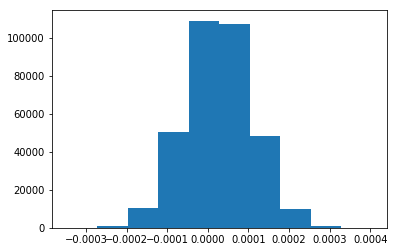

In [35]:
plt.hist(merged_df['SCORE1_AVG'])

(array([7.01000e+02, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        4.00000e+00, 2.17000e+02, 1.31479e+05, 1.97832e+05, 6.96400e+03]),
 array([ -9. ,  12.8,  34.6,  56.4,  78.2, 100. , 121.8, 143.6, 165.4,
        187.2, 209. ]),
 <a list of 10 Patch objects>)

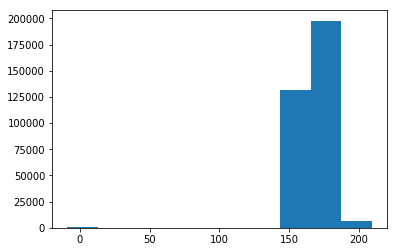

In [36]:
plt.hist(merged_df['phe'])

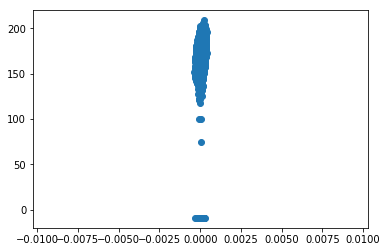

In [37]:
plt.scatter(
    merged_df['SCORE1_AVG'],
    merged_df['phe']
)

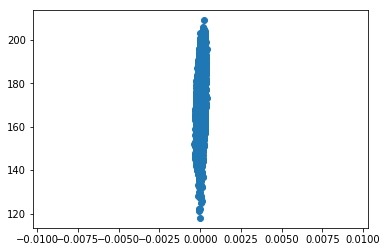

In [38]:
plt.scatter(
    merged_df[merged_df['phe'] > 100]['SCORE1_AVG'],
    merged_df[merged_df['phe'] > 100]['phe']
)

In [50]:
rsquared(
    merged_df[merged_df['phe'] > 100]['SCORE1_AVG'],
    merged_df[merged_df['phe'] > 100]['phe']
)

0.10784323289546859

In [61]:
merged2 = merged_df.merge(
    covar_df, on='IID'
)

In [63]:
merged2.head()

,IID,NMISS_ALLELE_CT,NAMED_ALLELE_DOSAGE_SUM,SCORE1_AVG,phe,age,sex,PC1,PC2,PC3,PC4
0,1000028,27000,5338,0.000070,176.0,54.0,0,-13.9881,3.69742,-0.379325,2.415610
1,1000034,26434,5241,0.000082,182.0,68.0,1,-12.8332,2.76107,-1.569210,0.666705
2,1000045,27096,5394,-0.000040,156.0,79.0,0,-14.0366,6.47430,-0.437916,4.497090
3,1000052,27034,5370,0.000079,159.0,72.0,0,-15.4658,3.81758,-0.301443,-0.635698
4,1000076,26986,5425,0.000127,175.0,72.0,1,-11.1046,1.52203,-1.565340,5.450450


In [64]:
from sklearn.linear_model import LinearRegression

In [67]:
X = merged2[['age', 'sex', 'PC1', 'PC2', 'PC3', 'PC4']].values

In [70]:
y = np.array(merged2['phe'])

In [71]:
reg = LinearRegression().fit(X, y)

In [72]:
reg.coef_

array([-1.63201178e-01,  1.32173668e+01,  4.01935167e-02, -4.93185741e-03,
        2.78813948e-04, -1.47628213e-01])

In [73]:
merged2['residuals'] = y - reg.predict(X)

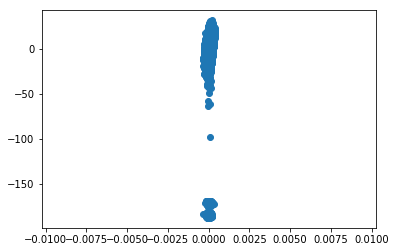

In [75]:
plt.scatter(
    merged2['SCORE1_AVG'],
    merged2['residuals']
)

In [76]:
rsquared(
    merged2['SCORE1_AVG'],
    merged2['residuals']

)

0.08529141174296834

In [82]:
full_model = LinearRegression().fit(
    merged2[merged2['phe'] != -9][['age', 'sex', 'PC1', 'PC2', 'PC3', 'PC4', 'SCORE1_AVG']].values,
    np.array(merged2[merged2['phe'] != -9]['phe'])
)


In [83]:
full_model.score(
    merged2[merged2['phe'] != -9][['age', 'sex', 'PC1', 'PC2', 'PC3', 'PC4', 'SCORE1_AVG']].values,
    np.array(merged2[merged2['phe'] != -9]['phe'])    
)

0.638325979670902